<a href="https://colab.research.google.com/github/tuanlym/DOANII/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install pyvi
!pip install pandas
!pip install numpy

     |████████████████████████████████| 8.5 MB 21.1 MB/s 
     |████████████████████████████████| 743 kB 44.5 MB/s 


In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install gensim
import numpy as np
import pandas as pd
import pickle
from os import listdir

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import sys
import os

from keras.regularizers import l1
from keras.layers import Activation
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding, Dropout
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer
from gensim.parsing.preprocessing import strip_non_alphanum, strip_multiple_whitespaces,preprocess_string, split_alphanum, strip_short, strip_numeric

In [ ]:
document = []
with open('/content/drive/MyDrive/DOANII /train_sents.txt','r') as f:
  data = f.readlines()
for d in data:
    document.append(d)
with open('/content/drive/MyDrive/DOANII /test_sents.txt','r') as f:
  data = f.readlines()
for d in data:
    document.append(d)
len(document)

In [ ]:
labels_data = []
with open('/content/drive/MyDrive/DOANII /train_sentiments.txt','r') as f:
  label_train = f.readlines()
for line in label_train:
  labels_data.append(line.strip())
with open('/content/drive/MyDrive/DOANII /test_sentiments.txt','r') as f:
  label_train = f.readlines()
for line in label_train:
  labels_data.append(line.strip())
len(labels_data)

14592

In [ ]:
labels = ['Tiêu cực', 'Trung tính', 'Tích cực']
_,counts = np.unique(labels_data, return_counts=True)
print("")
for i in range(len(labels)):
  print(labels[i], ':', counts[i],)


Tiêu cực : 6734
Trung tính : 625
Tích cực : 7233


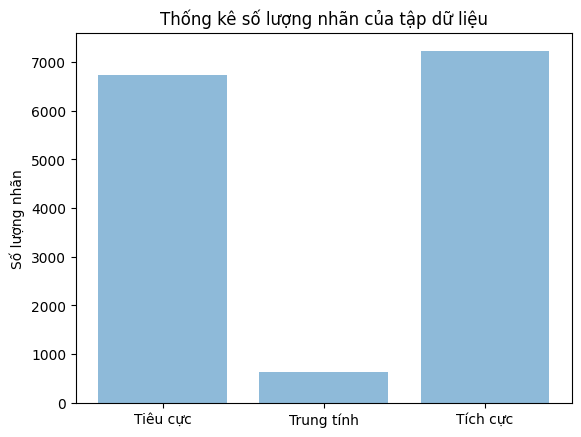

In [ ]:
y_pos = np.arange(len(labels))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Số lượng nhãn')
plt.title('Thống kê số lượng nhãn của tập dữ liệu')
plt.show()

In [ ]:
def clean_document(raw):
    raw = ViTokenizer.tokenize(raw)
    raw = strip_non_alphanum(raw).lower().strip()
    raw = split_alphanum(raw)
    raw = strip_short(raw, minsize=2)
    raw = strip_numeric(raw)
    tokens = raw.split()
    return tokens

In [ ]:
stop_word = ['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ', 'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng', 'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rằng', 'rất', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên', 'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [ ]:
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stop_word:
            words.append(word)
    return ' '.join(words)
    return line

In [ ]:
sentences = []
for d in document:
  d = ViTokenizer.tokenize(d)
  d = remove_stopwords(d)
  sentences.append(clean_document(d))
#sentences


In [ ]:
sum = 0
short = 1000
long = 0
for s in sentences:
  sum+=len(s)
  if (len(s) < short):
    short = len(s)
  if (len(s) > long):
    long = len(s)
sum

101996

In [ ]:
avg = sum/len(sentences)
print(len(sentences))
print(sum)
print(long)
print(short)

14592
101996
74
0
